# 二项逻辑斯谛回归模型

二项逻辑斯谛回归模型是如下的条件概率分布：

<img src='./pics/formula1.png'></img>
                
逻辑斯谛回归比较两个条件概率值的大小，将实例x分到概率值较大的那一类。

# 模型参数估计

设P(Y=1|x)=p(xi),P(Y=0|x)=1-p(xi)
对数似然函数为
<img src='./pics/formula2.png'></img>
对L(w)求极大值，得到w的估计值，即可得到模型。

定义损失函数loss=-L(w)，对L(w)求极大值，就是对loss求极小值，逻辑斯谛回归中通常采用的方法是梯度下降法、牛顿法及拟牛顿法。

梯度下降法，牛顿法，拟牛顿法介绍

https://www.cnblogs.com/shixiangwan/p/7532830.html
https://blog.csdn.net/qq_36330643/article/details/78003952
https://blog.csdn.net/baimafujinji/article/details/51179381

In [1]:
#数据加载
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

In [3]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3)

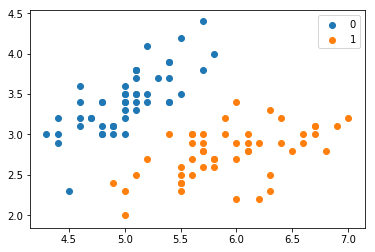

In [4]:
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()
plt.show()


In [23]:
class logisticRegression():
    def __init__(self, optimizer='gradientDescent'):
        self.optimizer = optimizer


    def gradientDescent(self,X, ytrain, w, iterations=1500,
                        learing_rate=0.1):
        m = X.shape[0]
        J_history=np.zeros((iterations,1))
        for iter in range(iterations):
            h = self.sigmoid(X.dot(w))
            J = self.computeCost(h, ytrain)
            J_history[iter]=J
            w = w - learing_rate * (X.T.dot(h - ytrain.T))/ m
        return J_history, w


    def Newton(self,X, ytrain,w,delta,iterations=60,
               learing_rate=0.1):
        m,n=X.shape
        J_history = np.zeros((iterations, 1))
        for k in range(iterations):
            hk = self.sigmoid(X.dot(w))
            J = self.computeCost(hk, ytrain)
            J_history[k] = J
            jacobian=(X.T.dot(hk - ytrain.T))
            if np.linalg.norm(jacobian)<delta:
                return J_history,w
            Hessian=self.getHessian(X,w)
            #这里给牛顿法加了学习率，不然w会变得很大，不做归一化且
            #不加学习率如何得到和梯度下降类似的结果目前还不太清楚，
            #对牛顿法处于一知半解的状态。
            w=w-learing_rate*np.linalg.solve(Hessian,jacobian)
        return J_history,w



    def getHessian(self,X,w):
        m,n=X.shape
        A=np.zeros((m,m))
        for i in range(m):
            h=self.sigmoid(X[i].dot(w))
            A[i,i]=h*(1-h)
        H=X.T.dot(A).dot(X)
        return H


    def train(self,Xtrain, ytrain, weights=None):
        Xtrain = np.mat(Xtrain)
        ytrain = np.mat(ytrain)
        m, n = Xtrain.shape
        w = np.zeros((n + 1, 1))
        if weights != None:
            w = weights
        X0 = np.ones((m, 1))
        X = np.column_stack((X0, Xtrain))
        if self.optimizer == 'gradientDescent':
            J_history, bestW = self.gradientDescent(X,ytrain, w)
            self.weights=bestW
            self.draw_J_history(J_history)
            
        elif self.optimizer=='Newton':
            delta=1e-5
            J_history,bestW=self.Newton(X,ytrain,w,delta)
            self.draw_J_history(J_history)
            self.weights=bestW
        
        print("fit complete!")
            


    def score(self, Xtest, ytest):
        m = Xtest.shape[0]
        X0 = np.ones((m, 1))
        X = np.column_stack((X0, Xtest))
        h = self.sigmoid(X.dot(self.weights)) > 0.5
        y = np.mat(ytest).T
        accuracy = np.sum(h == y)
        print("accuracy is: ", accuracy / m * 100)



    def computeCost(self,h, y):
        m = h.shape[0]
        return -(1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))



    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))



    def draw_J_history(self,J_history):
        plt.plot(J_history)
        plt.xlabel('iter')
        plt.ylabel('cost')
        plt.show()
        

    def drawFitLine(self, X):
        x_points = range(4, 8)
        y_ = -(self.weights[1, 0] * x_points +
               self.weights[0, 0]) / self.weights[2, 0]
        plt.plot(x_points, y_)
        plt.scatter(X[:50, 0], X[:50, 1], label='0')
        plt.scatter(X[50:, 0], X[50:, 1], label='1')
        plt.legend()
        plt.show()
        
         


# 梯度下降法（默认）

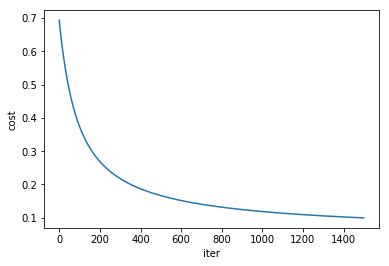

fit complete!


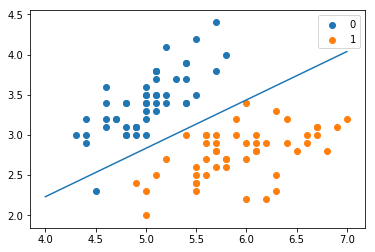

In [24]:
myLR=logisticRegression()
myLR.train(X_train,y_train)
myLR.drawFitLine(X)

In [25]:
myLR.score(X_test,y_test)

accuracy is:  100.0


# 牛顿法

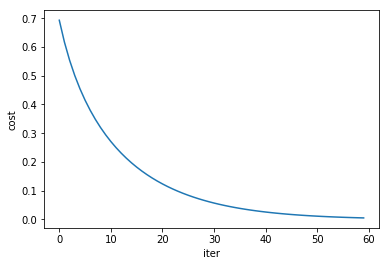

fit complete!


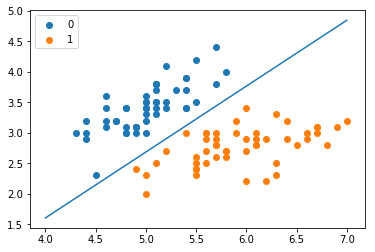

In [26]:
newtonLR=logisticRegression(optimizer='Newton')
newtonLR.train(X_train,y_train)
newtonLR.drawFitLine(X)

In [27]:
newtonLR.score(X_test,y_test)

accuracy is:  100.0
